In [18]:
import pandas as pd

titanic_df = pd.read_csv('train_and_test2.csv')

# Show first 5 rows
titanic_df.head()


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [20]:
# Overview of the dataset
titanic_df.info()

# Count missing values in each column
titanic_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
Survived       0
dtype: int64

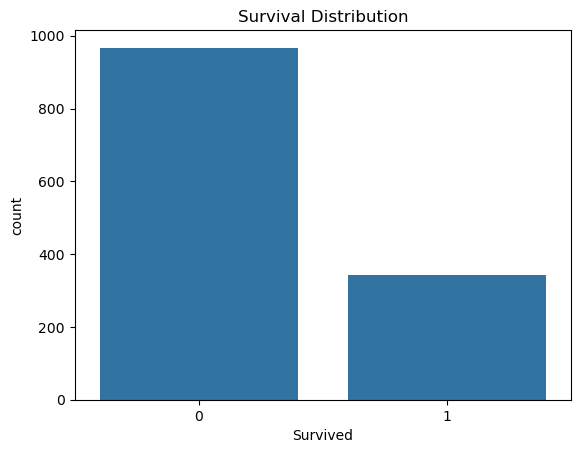

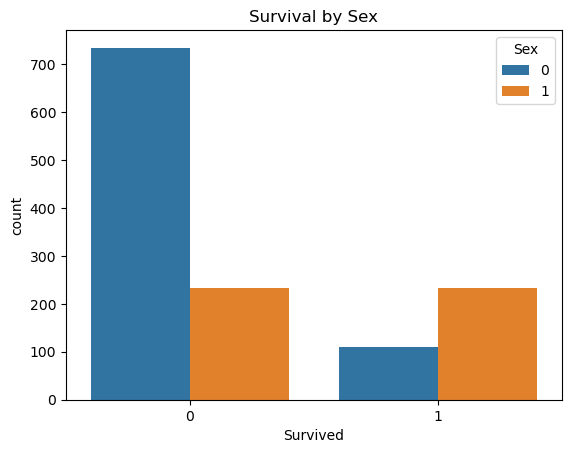

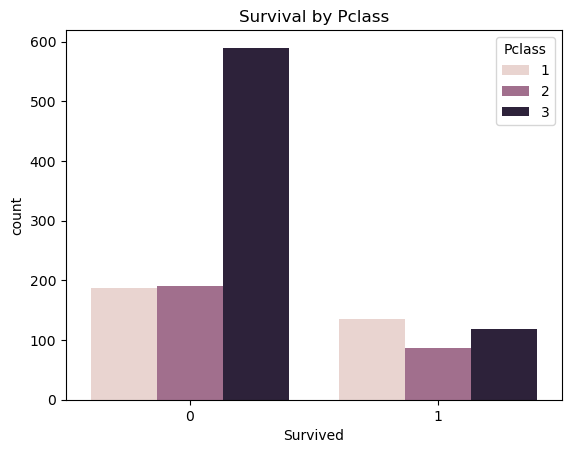

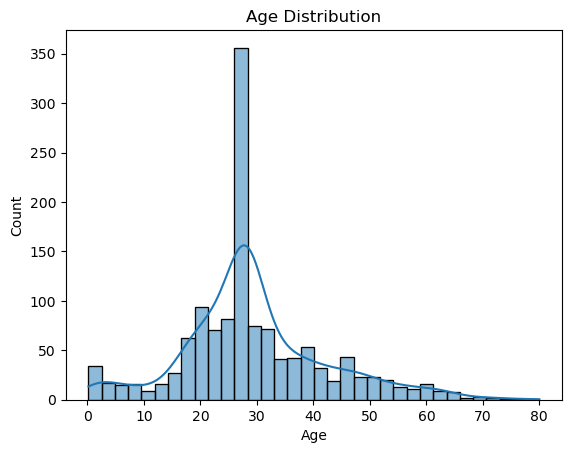

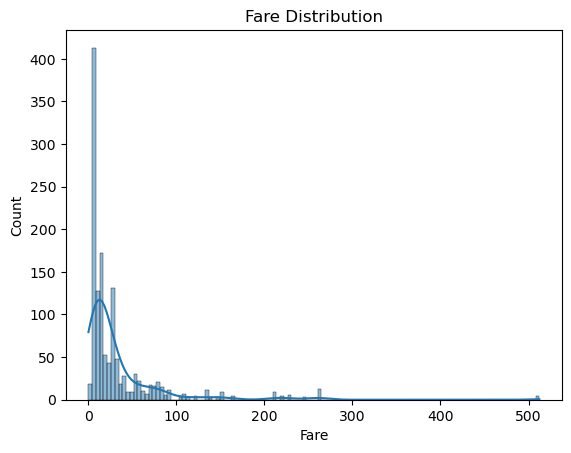

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival distribution
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Distribution')
plt.show()

# Survival by Sex
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.title('Survival by Sex')
plt.show()

# Survival by Passenger Class
sns.countplot(x='Survived', hue='Pclass', data=titanic_df)
plt.title('Survival by Pclass')
plt.show()

# Age distribution
sns.histplot(titanic_df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

# Fare distribution
sns.histplot(titanic_df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


In [34]:
# Fill missing Age values with median
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

# Fill missing Embarked values with mode if it exists
if 'Embarked' in titanic_df.columns:
    titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

# Drop 'Cabin' column if it exists
if 'Cabin' in titanic_df.columns:
    titanic_df = titanic_df.drop(columns=['Cabin'])

# Verify missing values
titanic_df.isnull().sum()


Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       0
zero.17        0
zero.18        0
Survived       0
FamilySize     0
Alone          0
dtype: int64

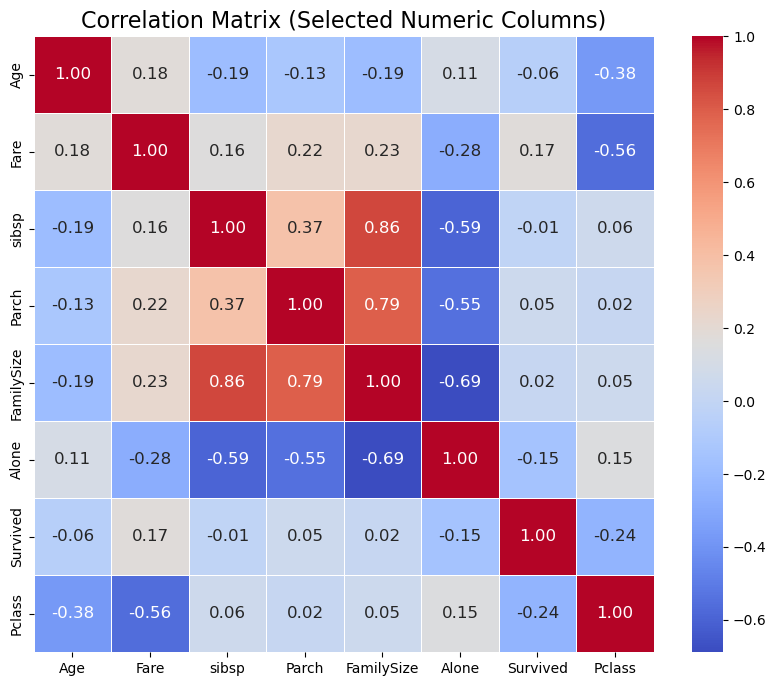

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns relevant for correlation
numeric_cols = ['Age', 'Fare', 'sibsp', 'Parch', 'FamilySize', 'Alone', 'Survived', 'Pclass']

corr = titanic_df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', 
            annot_kws={"size":12}, linewidths=0.5)
plt.title('Correlation Matrix (Selected Numeric Columns)', fontsize=16)
plt.show()


In [37]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features if needed
le = LabelEncoder()
titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'])

if 'Embarked' in titanic_df.columns:
    titanic_df['Embarked'] = le.fit_transform(titanic_df['Embarked'])

# Check updated data
titanic_df.head()


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived,FamilySize,Alone
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,3,0,0,2,0,0,0,1,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,3,0,0,2,0,0,1,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,1,0,0,2,0,0,1,1,0
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,3,0,0,2,0,0,0,0,1
